### 一维数据 可视化reg tree

In [345]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
%pprint   # use %pprint command to turn on/off pprint feature:

Pretty printing has been turned ON


### test on random.rand ~ N(0, 1)

random.rand ~ N(0, 1) 服从正态分布，通过大量采样计算mean var验证

In [346]:
x = np.random.randn(1000000)
x[:20]

array([-0.46662271, -0.09503872, -1.43514848, -0.00804863, -1.8042517 ,
       -0.63166336,  1.12877217, -1.05565397,  0.34298857, -0.45293935,
        0.30696902,  0.30798015,  0.73727299,  1.02797102, -0.74823915,
        0.52404065, -1.2478384 , -1.70728734, -0.48633522,  0.76940872])

In [347]:
x.mean()   # expect 0附近

0.0027893320246950423

In [348]:
x.var()   #variance 1附近

0.9984217277836454

### generate test data

In [349]:

y_arr = np.array([])
n = 60
center = [5, 10, 15, 20]  # 以这些数值为中心生成 label: y
parts = len(center)
for c in center:
    y_arr = np.append(y_arr, np.random.randn(n//parts) + c)  # 加入一些扰动
print(y_arr)

[ 5.8015674   3.9793704   6.12994157  5.71014609  4.13777455  4.92458507
  4.06387093  3.07393113  3.73368396  4.00976127  5.25933669  3.79059789
  6.48468936  4.92033127  6.336108    8.74717926 11.84375132  9.63135063
 10.08343232  8.93818064 10.11446635 10.30859316 10.07382547 10.61741699
  9.98080534 10.46274235 11.56914715 11.31264305  8.72876011  9.08460905
 14.63494748 15.65533521 15.16998071 14.30413159 14.1375248  15.06694948
 15.08716548 15.58631326 15.96975375 13.82799811 14.70754491 15.4209139
 15.66808846 14.36743248 15.82914147 19.66255104 21.00045871 18.63118028
 20.7111103  19.14854982 19.24463829 21.08562681 19.71822981 21.53608038
 19.3844173  20.54300677 17.8472967  19.94151823 20.89418358 19.24370332]


In [350]:
x_arr = np.arange(y_arr.shape[0]) + np.random.randn(y_arr.shape[0])  # 生成 data: x
# np.random.shuffle(x_arr)
print(x_arr[:10])

[-1.86037252  1.50691653  1.88393274  4.06419509  4.44613241  5.96174756
  3.73104784  5.56338131  9.56090145  8.59797104]


In [351]:
D = np.stack((x_arr, y_arr), axis=1)   # 用np.stack 将x, y沿axis=1合并
print(D.shape)
print(D[:10])

(60, 2)
[[-1.86037252  5.8015674 ]
 [ 1.50691653  3.9793704 ]
 [ 1.88393274  6.12994157]
 [ 4.06419509  5.71014609]
 [ 4.44613241  4.13777455]
 [ 5.96174756  4.92458507]
 [ 3.73104784  4.06387093]
 [ 5.56338131  3.07393113]
 [ 9.56090145  3.73368396]
 [ 8.59797104  4.00976127]]


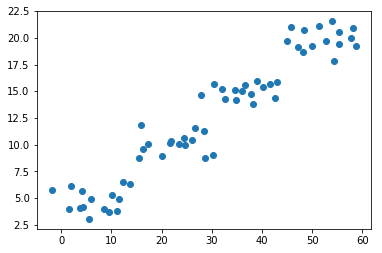

In [352]:
plt.scatter(D[:, 0], D[:, 1])

### build regression tree

In [353]:
def split_dataset(D, value):  # dataset, splitting value
    '''
    根据 value 将D 划分为 >, <= 两部分
    '''
    D_lte = D[ D[:, 0] <= value ]
    D_gt = D[ D[:, 0] > value]
#     if not np.any(D_lte):
#         D_lte = None
#     if not np.any(D_gt):
#         D_gt = None
    return D_lte, D_gt
    

In [354]:
# split_dataset(D, 0)
# dir(split_dataset)
# print(split_dataset.__doc__)

In [355]:
def cal_err(D):
    '''
    用平方误差度量训练误差
    '''
    if not np.any(D):  # empty array return err 0
        return 0
#     1.
#     ave = np.mean(D[:, 1])
#     return np.sum((D[:, 1] - ave)**2)
#     2.
    return np.var(D[:, 1]) * D.shape[0]   # 方差*N = sigma[(y-ave)**2]

In [356]:
# a = np.array([[1,1], [2, 4]])
# cal_err(a)

In [357]:
# cal_err(D)

In [358]:
# cal_err([])

In [359]:
# D1, D2 = split_dataset(D, 10)
# print(cal_err(D1), cal_err(D2))

In [360]:
max_depth = 3

def build_reg_tree(D, depth = 1):
#     print('-'*20)
#     print(D, depth)
    if depth == max_depth:
        if np.any(D):
            node = {'type':'end', 'value':np.mean(D[:,1])}  # 'end' node
            return node
        else:
            return None
    else:
        min_err = np.inf  # np.inf
        idx = -1
        for i in range(D.shape[0]): # try all possible split value
            D1, D2 = split_dataset(D, D[i][0])
            total_err = cal_err(D1) + cal_err(D2)  # calculate total error
            if total_err < min_err:
                min_err = total_err
                idx = i   # save best split index
                
        best_D1, best_D2 = split_dataset(D, D[idx][0])
        node = {'type':'decision', 'split_x':D[idx][0], 'lte_node':None, 'gt_node':None}
        if np.any(best_D1):
            node['lte_node'] = build_reg_tree(best_D1, depth+1)  # built tree recursively
        if np.any(best_D2):
            node['gt_node'] = build_reg_tree(best_D2, depth+1)
        return node
                

In [361]:
reg_tree = build_reg_tree(D)
pprint(reg_tree)

{'gt_node': {'gt_node': {'type': 'end', 'value': 19.90617008914382},
             'lte_node': {'type': 'end', 'value': 15.057019543870874},
             'split_x': 42.93177376676998,
             'type': 'decision'},
 'lte_node': {'gt_node': {'type': 'end', 'value': 10.383240665855341},
              'lte_node': {'type': 'end', 'value': 4.823713039499719},
              'split_x': 13.785028251612783,
              'type': 'decision'},
 'split_x': 30.16271134934278,
 'type': 'decision'}


In [362]:
def _predict_one(node, x_test):
    '''
    predict one test sample
    '''
    if node['type'] == 'decision':
        if x_test > node['split_x']:
            return _predict_one(node['gt_node'], x_test)
        else:
            return _predict_one(node['lte_node'], x_test)
    else: # 'end' node
        return node['value']
    
def predict(node, x_test_arr):
    '''
    predict multiple test samples
    x_test_arr: list or np.array
    '''
    res_list = []
    for d in x_test_arr:
        res_list.append(_predict_one(node, d))
    return np.array(res_list)

In [363]:
# plt.scatter(D[:, 0], D[:, 1])
_predict_one(reg_tree, 10)

4.823713039499719

In [364]:
predict(reg_tree, [10, 20])

array([ 4.82371304, 10.38324067])

In [365]:
print('predict result: ', predict(reg_tree, D[:, 0]))
print('ground truth: ', D[:, 1])

predict result:  [ 4.82371304  4.82371304  4.82371304  4.82371304  4.82371304  4.82371304
  4.82371304  4.82371304  4.82371304  4.82371304  4.82371304  4.82371304
  4.82371304  4.82371304  4.82371304 10.38324067 10.38324067 10.38324067
 10.38324067 10.38324067 10.38324067 10.38324067 10.38324067 10.38324067
 10.38324067 10.38324067 10.38324067 10.38324067 10.38324067 10.38324067
 10.38324067 15.05701954 15.05701954 15.05701954 15.05701954 15.05701954
 15.05701954 15.05701954 15.05701954 15.05701954 15.05701954 15.05701954
 15.05701954 15.05701954 15.05701954 19.90617009 19.90617009 19.90617009
 19.90617009 19.90617009 19.90617009 19.90617009 19.90617009 19.90617009
 19.90617009 19.90617009 19.90617009 19.90617009 19.90617009 19.90617009]
ground truth:  [ 5.8015674   3.9793704   6.12994157  5.71014609  4.13777455  4.92458507
  4.06387093  3.07393113  3.73368396  4.00976127  5.25933669  3.79059789
  6.48468936  4.92033127  6.336108    8.74717926 11.84375132  9.63135063
 10.08343232  8.93

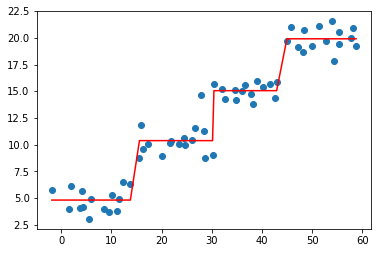

In [366]:
plt.scatter(D[:, 0], D[:, 1])

idx = np.argsort(D[:, 0])  # sort on x dim
sorted_D = D[idx, 0]
plt.plot(sorted_D, predict(reg_tree, sorted_D), c = 'r')   # draw regression line

### some test scripts

In [367]:
idx = np.argsort(D[:, 0])
idx

array([ 0,  1,  2,  6,  3,  4,  7,  5,  9,  8, 10, 11, 13, 12, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 27, 28, 29, 31, 32, 33,
       36, 34, 35, 37, 40, 39, 38, 41, 42, 43, 44, 45, 46, 49, 47, 48, 50,
       51, 52, 53, 56, 55, 54, 57, 58, 59])

In [368]:
D[:, 0]

array([-1.86037252,  1.50691653,  1.88393274,  4.06419509,  4.44613241,
        5.96174756,  3.73104784,  5.56338131,  9.56090145,  8.59797104,
       10.1535902 , 11.21899052, 12.41137532, 11.53200318, 13.78502825,
       15.5983104 , 15.95425059, 16.31803705, 17.25970765, 20.16977767,
       21.7818131 , 21.98159192, 23.42237155, 24.4410363 , 24.72374391,
       26.00863623, 26.59440272, 28.52582771, 28.69501969, 30.16271135,
       27.9281809 , 30.43995263, 32.09415621, 32.65468438, 34.92279881,
       35.95038056, 34.69715182, 36.64284096, 39.0282341 , 38.19997659,
       37.79263367, 40.21303592, 41.70453983, 42.58850998, 42.93177377,
       44.98045106, 45.7041293 , 48.18728439, 48.43049799, 47.14175859,
       50.06817429, 51.42866742, 52.83366002, 53.9309659 , 55.33649674,
       55.33643516, 54.32260235, 57.66816933, 58.20367469, 58.76930758])

In [369]:
D[idx, 0]

array([-1.86037252,  1.50691653,  1.88393274,  3.73104784,  4.06419509,
        4.44613241,  5.56338131,  5.96174756,  8.59797104,  9.56090145,
       10.1535902 , 11.21899052, 11.53200318, 12.41137532, 13.78502825,
       15.5983104 , 15.95425059, 16.31803705, 17.25970765, 20.16977767,
       21.7818131 , 21.98159192, 23.42237155, 24.4410363 , 24.72374391,
       26.00863623, 26.59440272, 27.9281809 , 28.52582771, 28.69501969,
       30.16271135, 30.43995263, 32.09415621, 32.65468438, 34.69715182,
       34.92279881, 35.95038056, 36.64284096, 37.79263367, 38.19997659,
       39.0282341 , 40.21303592, 41.70453983, 42.58850998, 42.93177377,
       44.98045106, 45.7041293 , 47.14175859, 48.18728439, 48.43049799,
       50.06817429, 51.42866742, 52.83366002, 53.9309659 , 54.32260235,
       55.33643516, 55.33649674, 57.66816933, 58.20367469, 58.76930758])

In [370]:
a = np.array([[1,1], [2, 4]])
cal_err(D)

1940.0341039568725

In [371]:
5 <np.inf

True